# Data Cleaning and Understanding

# Contents
# Part 1
# 1. Basic understanding of data contents
# 2. Consistency checks
# 3. Change mixed data types 
# 4. Address missing values (remove column, remove rows, impute values)
# 5. Check for duplicates
# Part 2
# 6. Data Understanding 
# 7. Understand categories within columns using groupby
# 8. Aggregate variables 
# 9. Generate Histograms for numerical variables

In [1]:
#import libraries
import csv
import pandas as pd
import numpy as np
import os

In [2]:
# Define file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/6.1' 
# Get Electric Vehicle df
EV_df = pd.read_csv(os.path.join(path,'02 Data', 'Original', 'Electric_Vehicle_Population_Data.csv'),index_col = False)

# 1. Basic understanding of data contents

In [3]:
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
EV_df.shape

(235692, 17)

In [5]:
EV_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [6]:
# Electric Range 0 is unknown.  
# From data landing page: Electric Range is no longer maintained for BEVs because new BEVs have an electric range of 30 miles or more. 
# Zero (0) will be entered where the electric range has not been researched.
# Base MSRP mean value seems unlikely - perhaps too many 0 values.
# Examine data types
EV_df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# 2. Consistency checks

In [25]:
#check for mixed types updated code sourced from ChatGPT to avoid error message in future
for col in EV_df.columns.tolist():
    # Check type of each element in the column
    weird = (EV_df[col].map(type) != type(EV_df[col].iloc[0])).any()
    if weird:
        print(col)

County
City
Postal Code
Model Year
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
Vehicle Location
Electric Utility
2020 Census Tract


In [29]:
# look further into these 11 columns 
for col in EV_df.columns.tolist():
    if EV_df[col].dtype == 'object':  # Focus on object types
        unique_types = EV_df[col].apply(type).unique()
        print(f"{col}: {unique_types}")

VIN (1-10): [<class 'str'>]
County: [<class 'str'> <class 'float'>]
City: [<class 'str'> <class 'float'>]
State: [<class 'str'>]
Make: [<class 'str'>]
Model: [<class 'str'>]
Electric Vehicle Type: [<class 'str'>]
Clean Alternative Fuel Vehicle (CAFV) Eligibility: [<class 'str'>]
Vehicle Location: [<class 'str'> <class 'float'>]
Electric Utility: [<class 'str'> <class 'float'>]


# 3. Change mixed data types 

In [31]:
# change dtype for columns county, city, vehicle location and electric utility to 'str'
EV_df['County'] = EV_df['County'].astype('str')

In [33]:
# change dtype for columns county, city, vehicle location and electric utility to 'str'
EV_df['City'] = EV_df['City'].astype('str')

In [35]:
# change dtype for columns county, city, vehicle location and electric utility to 'str'
EV_df['Vehicle Location'] = EV_df['Vehicle Location'].astype('str')

In [37]:
# change dtype for columns county, city, vehicle location and electric utility to 'str'
EV_df['Electric Utility'] = EV_df['Electric Utility'].astype('str')

In [43]:
# investigate other columns
for col in EV_df.columns.tolist():
    if EV_df[col].dtype == 'float64':  # Focus on float types
        unique_types = EV_df[col].apply(type).unique()
        print(f"{col}: {unique_types}")

Postal Code: [<class 'float'>]
Electric Range: [<class 'float'>]
Base MSRP: [<class 'float'>]
Legislative District: [<class 'float'>]
2020 Census Tract: [<class 'float'>]


In [47]:
# no need to make changes, suspect null values
# investigate final integer column
for col in EV_df.columns.tolist():
    if EV_df[col].dtype == 'int64':  # Focus on int types
        unique_types = EV_df[col].apply(type).unique()
        print(f"{col}: {unique_types}")

Model Year: [<class 'int'>]
DOL Vehicle ID: [<class 'int'>]


In [49]:
# look for non-null values
for col in EV_df.columns.tolist():
    if EV_df[col].dtype == 'int64':
        print(f"Values in {col}:")
        print(EV_df[col].dropna().unique())  # Show unique non-null values

Values in Model Year:
[2019 2020 2023 2021 2012 2017 2022 2018 2014 2015 2016 2025 2013 2024
 2011 2000 2008 2010 2002 2003]
Values in DOL Vehicle ID:
[477309682 109705683 230390492 ... 261742288 253474854 229583490]


In [51]:
# no need to make changes, nothing weird, likely NaN values are responsible here.
# check dtypes again
for col in EV_df.columns.tolist():
    # Check type of each element in the column
    weird = (EV_df[col].map(type) != type(EV_df[col].iloc[0])).any()
    if weird:
        print(col)

Postal Code
Model Year
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
2020 Census Tract


In [53]:
# check for missing values
EV_df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      3
dtype: int64

# 4. Address missing values

In [57]:
# mixed dtypes accounted for in missing values
df_nan = EV_df[EV_df['Legislative District'].isnull()==True]

In [59]:
df_nan

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
61651,7SAYGDEE3P,San Mateo,Redwood City,CA,94063.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,233742778,POINT (-122.22772 37.4845),NON WASHINGTON STATE ELECTRIC UTILITY,6.081610e+09
79695,1C4JJXP69P,Harnett,Cameron,NC,28326.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,NaN,244964681,POINT (-79.25707 35.32671),NON WASHINGTON STATE ELECTRIC UTILITY,3.708507e+10
80828,5YJ3E1EC8N,Howard,Woodbine,MD,21797.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,272475612,POINT (-77.06409 39.35812),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10
81197,5YJ3E1EB9N,Beaufort,Okatie,SC,29909.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,216976861,POINT (-80.95653 32.30585),NON WASHINGTON STATE ELECTRIC UTILITY,4.501300e+10
83300,7SAYGDEEXP,Wake,Holly Springs,NC,27540.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,228246182,POINT (-78.8336 35.65242),NON WASHINGTON STATE ELECTRIC UTILITY,3.718305e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235520,5YJYGDEE7M,Los Angeles,Pacific Palisades,CA,90272.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,185002429,POINT (-118.52688 34.0471),NON WASHINGTON STATE ELECTRIC UTILITY,6.037263e+09
235538,5YJ3E1EB1N,Tarrant,Fort Worth,TX,76179.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,195179050,POINT (-97.43745 32.88706),NON WASHINGTON STATE ELECTRIC UTILITY,4.843911e+10
235591,5YJ3E1EB7S,St. Louis,Saint Louis,MO,63139.0,2025,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,280197158,POINT (-90.29132 38.62704),NON WASHINGTON STATE ELECTRIC UTILITY,2.951010e+10
235600,5YJSA1E43G,Tooele,Tooele,UT,84074.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,NaN,206808885,POINT (-112.29849 40.53408),NON WASHINGTON STATE ELECTRIC UTILITY,4.904513e+10


In [61]:
# Do I need the Legislative District column? 
# The legislative district is a code that relates to location but I have county names so I think it can be deleted. 
EV_df = EV_df.drop(columns = ['Legislative District'])

In [7]:
# Look into other missing values
df_nan = EV_df[EV_df['Electric Range'].isnull()==True]

In [9]:
df_nan

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1221,WP1AN2AY0S,King,Sammamish,WA,98074.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,274303165,POINT (-122.02054 47.60326),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4584,WP1AE2AY0S,King,Kirkland,WA,98033.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,276073472,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5128,WP1BN2AY7S,King,Seattle,WA,98112.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,274203905,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
7622,WP1BE2AY0S,King,Bellevue,WA,98005.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,274102944,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
10007,W1NKM8AB0S,King,Bellevue,WA,98006.0,2025,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,275628825,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
10480,WP1AN2AY0S,King,Seattle,WA,98116.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,276916755,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
23592,WP1BE2AY8S,King,Seattle,WA,98125.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,274122320,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
32622,WP1AE2AY0S,King,Mercer Island,WA,98040.0,2025,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,272915765,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
40668,WP0AC2YA2S,King,Medina,WA,98039.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,274380816,POINT (-122.23892 47.61613),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
41008,WP0AC2YA3S,King,Shoreline,WA,98177.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,274513284,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


In [11]:
# All the NaNs in electric range (MIN O TO MAX337) are clean alt fuel Vehicle eligible Porsche and Mercedes.
# MSRP min 0 max $845,000. multiple 0 throwing out mean.
# Missing (9)2025 PORSCHE PANAMERA PLUG-IN HYBRID (MSRP $104,795); (21)2025 PORSCHE CAYENNE PLUG-IN HYBRID (MSRP US$86,695.00); (1)2025 MERCEDES SL-CLASS PLUG-IN HYBRID (MSRP $113,100); (5)2025 MERCEDES GLC-CLASS PLUG-IN HYBRID (MSRP $61,050); MEAN MISSING $88,392
# Notes on data source landing page post 2019 assume 30+ miles and a 0 means its not researched.
# Missing 2025 PORSCHE PANAMERA PLUG-IN HYBRID (ER 30); 2025 PORSCHE CAYENNE PLUG-IN HYBRID (ER 60); 2025 MERCEDES SL-CLASS PLUG-IN HYBRID (ER 7); 2025 MERCEDES GLC-CLASS PLUG-IN HYBRID (ER 54); MEAN MISSING ER = 50
# IMPUTE MEAN VALUES (ER 50, MSRP $88,392) as need numerical data for project and 36 rows will have minimal effect on stats. 
EV_df.fillna({'Electric Range': 50, 'Base MSRP': 88392}, inplace=True)

In [ ]:
# Look for postal code and census tract
df_nan = EV_df[EV_df['Postal Code'].isnull()==True]

In [67]:
df_nan

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
143795,5YJ3E1EB2M,nan,nan,NS,NaN,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,179569743,nan,nan,NaN
207874,5YJXCAE24H,nan,nan,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,nan,nan,NaN
228148,WBAJA9C50K,nan,nan,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,53400.0,NaN,244582593,nan,nan,NaN


In [69]:
# delete these rows from the table as much missing data.
updated_EV_df = EV_df[EV_df['Postal Code'].isnull() == False]

In [19]:
# recheck for missing values
updated_EV_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# 5. Check for duplicates

In [73]:
# Look for duplicates
df_dups = updated_EV_df[updated_EV_df.duplicated()]

In [75]:
df_dups

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [79]:
# No duplicates! Check shape expect (235,689, 16) to account for deleted column and rows
updated_EV_df.shape

(235689, 16)

In [127]:
# print column names
updated_EV_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

In [83]:
# export clean df
updated_EV_df.to_pickle(os.path.join(path, '02 Data','Prepared', 'EV_clean.pkl'))

# 6. Data Understanding 

In [5]:
EV_df.shape

(235689, 16)

In [7]:
EV_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235689.000000,235689.000000,235689.000000,2.356890e+05,2.356890e+05
mean,98177.656463,2021.406688,46.262812,800.432846,2.353132e+08,5.298066e+10
std,2524.218661,2.991909,84.039283,7257.550227,6.799114e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,2.053466e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,2.522802e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,2.696404e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,4.792548e+08,5.602100e+10


# 7. Understand categories within columns using groupby

In [17]:
# How many Electric Vehicle Types are there?
EV_df.groupby('Electric Vehicle Type').agg({'Electric Range': ['mean', 'min', 'max']})

Electric Range            
                                                 mean  min    max
Electric Vehicle Type                                            
Battery Electric Vehicle (BEV)              50.163266  0.0  337.0
Plug-in Hybrid Electric Vehicle (PHEV)      31.283881  6.0  153.0

In [19]:
# How is ER related to eligibility variable?
EV_df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').agg({'Electric Range': ['mean', 'min', 'max']})

Electric Range             
                                                             mean   min    max
Clean Alternative Fuel Vehicle (CAFV) Eligibility                             
Clean Alternative Fuel Vehicle Eligible                142.401863  30.0  337.0
Eligibility unknown as battery range has not be...       0.000000   0.0    0.0
Not eligible due to low battery range                   20.488259   6.0   29.0

In [ ]:
# 0.00 in Electric Range relates to the eligibility unknown category. Good to know.

In [21]:
# How many unknowns do we have?
EV_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    139760
Clean Alternative Fuel Vehicle Eligible                          73316
Not eligible due to low battery range                            22613
Name: count, dtype: int64

In [23]:
# have 73316 values available for numerical analysis. OK for project. 
# Are all ER 0.00 = eligilbility unknown? How many ER values do we have available for numerical analysis?
EV_df['Electric Range'].value_counts()

Electric Range
0.0      139760
215.0      6403
32.0       5417
25.0       4668
21.0       4574
          ...  
51.0          5
11.0          4
95.0          3
57.0          2
45.0          1
Name: count, Length: 110, dtype: int64

In [25]:
# would prefer less zeros/unknown but still ok for project.
EV_df['Base MSRP'].value_counts()

Base MSRP
0.0         232401
69900.0       1318
31950.0        361
52900.0        215
32250.0        133
59900.0        126
54950.0        119
39995.0        117
36900.0        105
44100.0         91
64950.0         87
45600.0         79
52650.0         71
33950.0         71
34995.0         67
55700.0         57
36800.0         55
53400.0         38
88392.0         36
98950.0         21
110950.0        21
81100.0         21
90700.0         17
75095.0         13
102000.0        11
184400.0        10
43700.0          8
109000.0         7
89100.0          6
91250.0          4
32995.0          2
845000.0         1
Name: count, dtype: int64

# 8. Aggregate variables 

In [27]:
# The 845,000 value is an outlier and I suspect a typo. 84,500 makes more sense. 
# Impute median Base MSRP for 0s? I think there are too many values and this will effect results.
# Are 0 values in each model category?
EV_df.groupby('Make').agg({'Base MSRP': ['mean', 'min', 'max']})

Base MSRP                   
                                mean      min       max
Make                                                   
ACURA                       0.000000      0.0       0.0
ALFA ROMEO                  0.000000      0.0       0.0
AUDI                        0.000000      0.0       0.0
AZURE DYNAMICS              0.000000      0.0       0.0
BENTLEY                     0.000000      0.0       0.0
BMW                      2683.796392      0.0   91250.0
BRIGHTDROP                  0.000000      0.0       0.0
CADILLAC                  849.638816      0.0   75095.0
CHEVROLET                   0.000000      0.0       0.0
CHRYSLER                 1235.978605      0.0   39995.0
DODGE                       0.000000      0.0       0.0
FIAT                        0.000000      0.0       0.0
FISKER                   6131.147541      0.0  102000.0
FORD                        0.000000      0.0       0.0
GENESIS                     0.000000      0.0       0.0
GMC                         0.000000      0.0       0.0
HONDA                       0.000000      0.0       0.0
HYUNDAI                     0.000000      0.0       0.0
JAGUAR                      0.000000      0.0       0.0
JEEP                        0.000000      0.0       0.0
KIA                      1607.197003      0.0   33950.0
LAMBORGHINI                 0.000000      0.0       0.0
LAND ROVER                  0.000000      0.0       0.0
LEXUS                       0.000000      0.0       0.0
LINCOLN                     0.000000      0.0       0.0
LUCID                       0.000000      0.0       0.0
MAZDA                       0.000000      0.0       0.0
MERCEDES-BENZ             222.743385      0.0   88392.0
MINI                     5257.130125      0.0   36900.0
MITSUBISHI                  0.000000      0.0       0.0
MULLEN AUTOMOTIVE INC.      0.000000      0.0       0.0
NISSAN                      0.000000      0.0       0.0
POLESTAR                    0.000000      0.0       0.0
PORSCHE                  4778.738128      0.0  845000.0
RAM                         0.000000      0.0       0.0
RIVIAN                      0.000000      0.0       0.0
ROLLS-ROYCE                 0.000000      0.0       0.0
SMART                       0.000000      0.0       0.0
SUBARU                   1165.340457      0.0   34995.0
TESLA                    1037.283088      0.0  110950.0
TH!NK                       0.000000      0.0       0.0
TOYOTA                      0.000000      0.0       0.0
VINFAST                     0.000000      0.0       0.0
VOLKSWAGEN                  0.000000      0.0       0.0
VOLVO                    2904.153872      0.0   64950.0
WHEEGO ELECTRIC CARS    32995.000000  32995.0   32995.0

In [29]:
# suspect many MSRP values are 0 :(
# which makes are more popular?
EV_df['Make'].value_counts()

Make
TESLA                     101078
CHEVROLET                  17135
NISSAN                     15532
FORD                       12605
KIA                        11345
BMW                         9646
TOYOTA                      9478
HYUNDAI                     7406
RIVIAN                      6750
VOLKSWAGEN                  5976
JEEP                        5955
VOLVO                       5862
AUDI                        4360
CHRYSLER                    3786
MERCEDES-BENZ               2381
HONDA                       2134
SUBARU                      2012
PORSCHE                     1474
POLESTAR                    1260
CADILLAC                    1149
MINI                        1122
MITSUBISHI                  1114
MAZDA                       1020
LEXUS                        959
DODGE                        780
FIAT                         773
LUCID                        395
LINCOLN                      361
GMC                          360
GENESIS                      344
SMART

In [31]:
# As suspected many MSRP values set to 0. Still a lot to work with for analysis.
# Interested to know how many cars from out of Washington State
EV_df['State'].value_counts()

State
WA    235198
CA       112
VA        62
MD        38
TX        28
CO        21
FL        19
NC        18
GA        15
NY        11
CT        11
AZ        11
NV        11
MO        10
KS         9
OR         9
IL         9
NJ         9
AL         8
HI         7
MA         7
RI         6
MI         6
PA         6
SC         6
KY         5
OH         5
TN         4
NE         4
DC         4
ID         3
ME         2
WY         2
NM         2
DE         1
WI         1
AR         1
OK         1
MS         1
NH         1
IN         1
AK         1
LA         1
MN         1
UT         1
Name: count, dtype: int64

In [33]:
# seems right that the most migrants are from California. 
# Could use a subset of just Washington cars?  Particularly if I can cross reference with economic status.
# Create a migrant flag, perhaps gradiated by distance. Group migrants by region?
EV_df['County'].value_counts()

County
King             118711
Snohomish         28814
Pierce            19256
Clark             14101
Thurston           8595
                  ...  
Doña Ana              1
Norfolk               1
Isle of Wight         1
Jackson               1
Tooele                1
Name: count, Length: 212, dtype: int64

In [35]:
# Likely the highest value counts are Washington counties. 
# The most EVs are in King county. King county includes Seattle. Is it outer (suburban) or inner city? 
# Are there more EVs in affluent suburbs? Does a per capita comparison even it out (eg. densely populated=more Evs)? would need to source data or indices to cross reference.
EV_df['Electric Utility'].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               85298
PUGET SOUND ENERGY INC                                                                      48923
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                40106
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                            13761
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY             10685
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY                                   2
CITY OF SEATTLE - (WA)                                                                          2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY                                      1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                        1
BON

In [37]:
# 76 Electric Utilities in the mix. perhaps some data entry issues here? 
# Not sure at this stage how I would use this variable. Does City of Seattle also have a subsiduary in Tacoma?
# Likely most providers service Seattle. 
# Project needs geographic overview, demographic overview, av household incomes/county or similar could also be useful metric.
# What is the age range of the EVs?
EV_df['Model Year'].value_counts()

Model Year
2023    59893
2024    49044
2022    28958
2021    20614
2018    14368
2020    12265
2025    11176
2019    10973
2017     8569
2016     5306
2015     4661
2013     4230
2014     3407
2012     1490
2011      680
2010       23
2008       22
2000        7
2002        2
2003        1
Name: count, dtype: int64

In [39]:
# Interesting to compare model year by county. Where are the oldest EVS, the newest EVs . . 
# Could potentially get moving average by model year to see if there was increase in EVs overtime. 
EV_df.groupby('County').agg({'Model Year': ['median', 'min', 'max']})

Model Year            
               median   min   max
County                           
Adams          2022.0  2011  2025
Alameda        2022.0  2019  2023
Albemarle      2014.0  2014  2014
Alexandria     2020.0  2018  2024
Allegheny      2021.5  2020  2023
...               ...   ...   ...
Williamson     2021.0  2019  2023
Wise           2019.5  2017  2022
Yakima         2022.0  2011  2025
York           2024.0  2024  2024
Yuba           2023.0  2023  2023

[212 rows x 3 columns]

# 9. Generate Histograms

<Axes: ylabel='Frequency'>

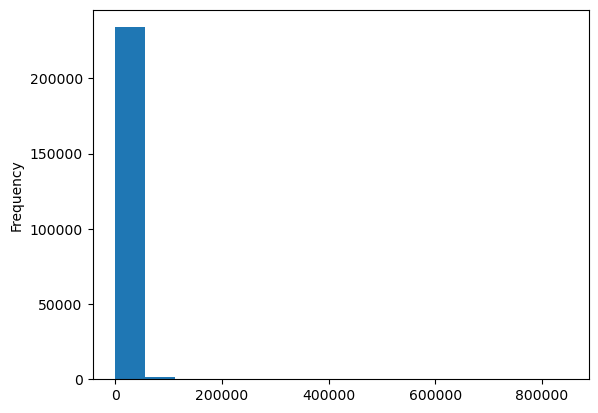

In [63]:
# consider if Base MSRP values are useful
EV_df['Base MSRP'].plot.hist(bins = 15)

<Axes: ylabel='Frequency'>

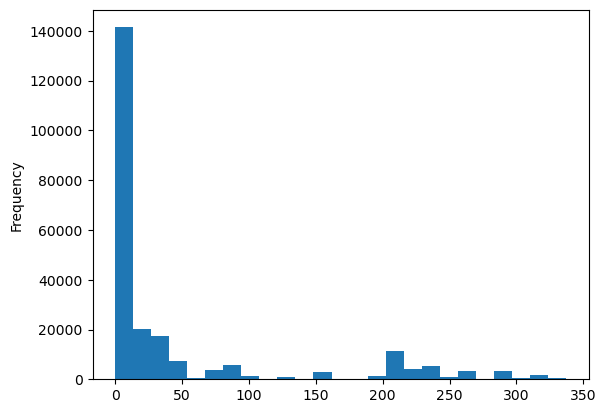

In [43]:
# Hmmm. How about Electric range?
EV_df['Electric Range'].plot.hist(bins = 25)

In [ ]:
# Better. 
# End Data Understanding #